<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Understanding-dplyr-in-R/blob/main/Understanding_dplyr_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

There are 6 main verbs in dplyr:
* Filter
* Select
* Pipe
* Group By
* Summarize
* Mutate
* Arrange

In [28]:
library(dplyr)
library(ggplot2)

## filter

In [29]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [30]:
dim(mpg)

[1] 234  11

In [31]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


In [32]:
names(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

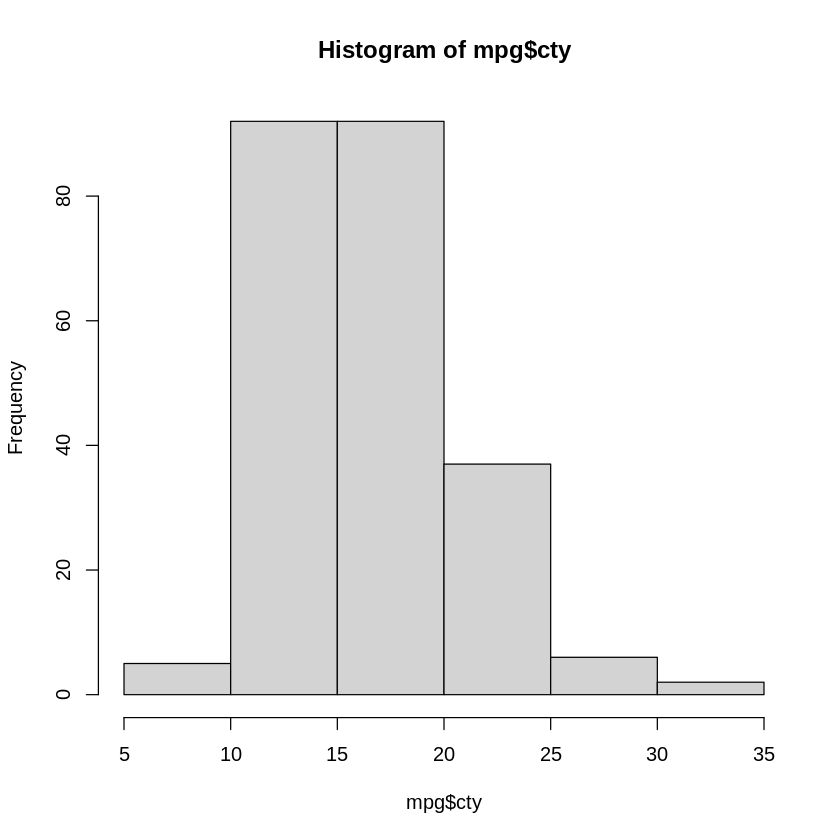

In [33]:
hist(mpg$cty)

filtering cars that are over 25km/gallon

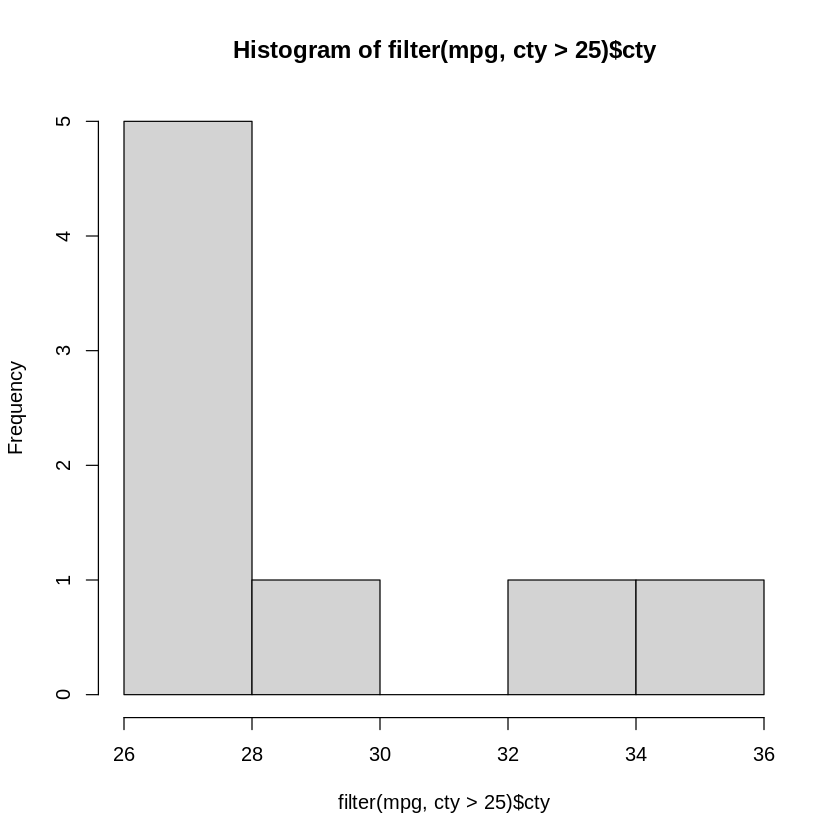

In [34]:
hist(filter(mpg, cty>25)$cty)

In [35]:
filter(mpg, cty>25 & model == "civic")

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
honda,civic,1.8,2008,4,manual(m5),f,26,34,r,subcompact


## select

In [36]:
# select from mpg, data
head(select(mpg, c(model, year)))

model,year
<chr>,<int>
a4,1999
a4,1999
a4,2008
a4,2008
a4,1999
a4,1999


## pipe

In [37]:
#  %>%
mpg%>%filter(cty>25)%>%select(c(model, year))

model,year
<chr>,<int>
civic,1999
civic,2008
corolla,1999
corolla,2008
corolla,2008
jetta,1999
new beetle,1999
new beetle,1999


In [38]:
names(mpg)

[1] "manufacturer" "model"        "displ"        "year"         "cyl"         
 [6] "trans"        "drv"          "cty"          "hwy"          "fl"          
[11] "class"

In [39]:
#what model of cars get the worst gas mileage (under 15mpg(miles per gallon))
head(
  mpg%>%
  filter(cty<15)%>%
  select(model)
)

model
<chr>
c1500 suburban 2wd
c1500 suburban 2wd
c1500 suburban 2wd
c1500 suburban 2wd
c1500 suburban 2wd
k1500 tahoe 4wd


## Group By and Summarise

In [40]:
mpg%>%
  group_by(manufacturer)%>%
  summarise(count = n(), avgcty = mean(cty, na.rm = T))

manufacturer,count,avgcty
<chr>,<int>,<dbl>
audi,18,17.61111
chevrolet,19,15.00000
dodge,37,13.13514
ford,25,14.00000
honda,9,24.44444
hyundai,14,18.64286
jeep,8,13.50000
land rover,4,11.50000
lincoln,3,11.33333


## Mutate and Arrange
mutate: allows us to create new columns

In [41]:
mpg%>%
  group_by(manufacturer)%>%
  summarise(count = n(), avgcty = mean(cty, na.rm = T))%>%
  mutate(test = count * avgcty)

manufacturer,count,avgcty,test
<chr>,<int>,<dbl>,<dbl>
audi,18,17.61111,317
chevrolet,19,15.00000,285
dodge,37,13.13514,486
ford,25,14.00000,350
honda,9,24.44444,220
hyundai,14,18.64286,261
jeep,8,13.50000,108
land rover,4,11.50000,46
lincoln,3,11.33333,34


In [42]:
head(
  mpg%>%
  mutate(conversion = displ*.16)%>%
  select(c(manufacturer, model, displ, conversion))%>%
  arrange(conversion)   #arrange(desc(conversion))
, 10)

manufacturer,model,displ,conversion
<chr>,<chr>,<dbl>,<dbl>
honda,civic,1.6,0.256
honda,civic,1.6,0.256
honda,civic,1.6,0.256
honda,civic,1.6,0.256
honda,civic,1.6,0.256
audi,a4,1.8,0.288
audi,a4,1.8,0.288
audi,a4 quattro,1.8,0.288
audi,a4 quattro,1.8,0.288
